In [67]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
from pylab import mpl, plt
import pytz

In [68]:
plt.rcParams['figure.figsize'] = (20,4)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [69]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [70]:
ativo = 'WDOJ22'

In [71]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [72]:
df = get_ohlc(ativo, mt5.TIMEFRAME_M15, 500)

In [73]:
df['var'] = df['close'].pct_change()

In [74]:
#df = df[df['real_volume'] > 14000]

In [75]:
df

,open,high,low,close,tick_volume,spread,real_volume,var
time,,,,,,,,
2022-02-11 16:30:00,5295.0,5295.0,5295.0,5295.0,1,500,1,NaN
2022-02-11 16:45:00,5300.0,5303.0,5300.0,5303.0,16,500,106,0.001511
2022-02-11 17:00:00,5305.0,5310.0,5297.0,5310.0,10,500,104,0.001320
2022-02-11 17:15:00,5310.0,5318.5,5310.0,5315.0,4,500,6,0.000942
2022-02-11 17:30:00,5314.5,5327.5,5314.5,5327.5,11,500,95,0.002352
...,...,...,...,...,...,...,...,...
2022-03-08 17:15:00,5089.5,5095.5,5089.0,5095.0,3046,500,46153,0.001179
2022-03-08 17:30:00,5095.0,5097.0,5092.0,5096.0,3121,500,37744,0.000196
2022-03-08 17:45:00,5096.0,5101.5,5093.0,5099.0,3183,500,33687,0.000589


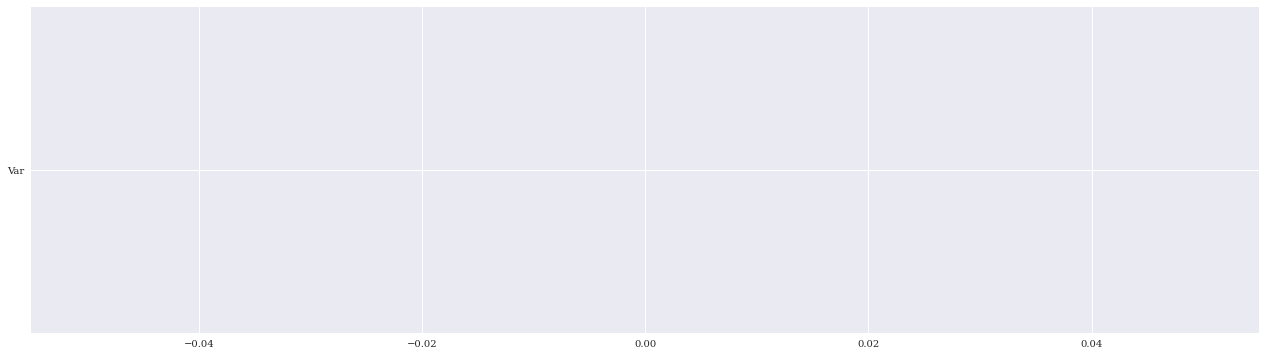

In [76]:
plt.figure(figsize=(22,6))
plt.plot('Var', data=df);

#### Cosntrução de colunas para análise de pavios

In [77]:
#stock['direcional'] = stock['variação %'] > 0
def force(num):
    if num > 0:        
        return 'subiu'
    elif num < 0 :
        return 'caiu'
    elif num == 0 :
        return 'zero'

df['movimento'] = df['var'].map(force)

In [78]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento
time,,,,,,,,,
2022-02-11 16:30:00,5295.0,5295.0,5295.0,5295.0,1,500,1,NaN,None
2022-02-11 16:45:00,5300.0,5303.0,5300.0,5303.0,16,500,106,0.001511,subiu
2022-02-11 17:00:00,5305.0,5310.0,5297.0,5310.0,10,500,104,0.001320,subiu
2022-02-11 17:15:00,5310.0,5318.5,5310.0,5315.0,4,500,6,0.000942,subiu
2022-02-11 17:30:00,5314.5,5327.5,5314.5,5327.5,11,500,95,0.002352,subiu
...,...,...,...,...,...,...,...,...,...
2022-03-08 17:15:00,5089.5,5095.5,5089.0,5095.0,3046,500,46153,0.001179,subiu
2022-03-08 17:30:00,5095.0,5097.0,5092.0,5096.0,3121,500,37744,0.000196,subiu
2022-03-08 17:45:00,5096.0,5101.5,5093.0,5099.0,3183,500,33687,0.000589,subiu


In [79]:
df.movimento.value_counts()

subiu    241
caiu     239
zero      19
Name: movimento, dtype: int64

In [80]:
df_positivo = df[df['movimento'] == 'subiu']

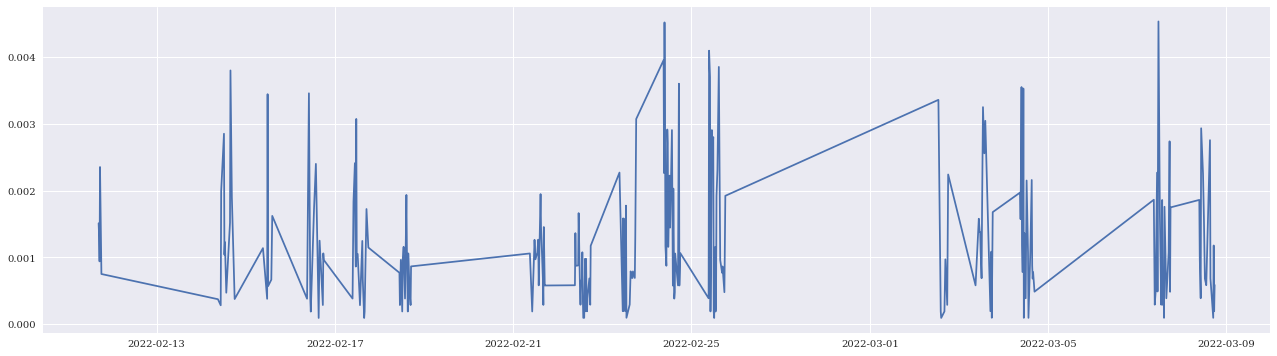

In [81]:
plt.figure(figsize=(22,6))
plt.plot('var', data=df_positivo);

In [82]:
df['Retorno_simples'] = (df['close'] / df['close'].shift(1)) - 1

In [83]:
df['maxima'] = (df['high'] / df['open']) - 1

In [84]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima
time,,,,,,,,,,,
2022-02-11 16:30:00,5295.0,5295.0,5295.0,5295.0,1,500,1,NaN,None,NaN,0.000000
2022-02-11 16:45:00,5300.0,5303.0,5300.0,5303.0,16,500,106,0.001511,subiu,0.001511,0.000566
2022-02-11 17:00:00,5305.0,5310.0,5297.0,5310.0,10,500,104,0.001320,subiu,0.001320,0.000943
2022-02-11 17:15:00,5310.0,5318.5,5310.0,5315.0,4,500,6,0.000942,subiu,0.000942,0.001601
2022-02-11 17:30:00,5314.5,5327.5,5314.5,5327.5,11,500,95,0.002352,subiu,0.002352,0.002446
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 17:15:00,5089.5,5095.5,5089.0,5095.0,3046,500,46153,0.001179,subiu,0.001179,0.001179
2022-03-08 17:30:00,5095.0,5097.0,5092.0,5096.0,3121,500,37744,0.000196,subiu,0.000196,0.000393
2022-03-08 17:45:00,5096.0,5101.5,5093.0,5099.0,3183,500,33687,0.000589,subiu,0.000589,0.001079


In [85]:
def extreme(n):
    if n == 'subiu': 
        x = df['high'] / df['open']       
        return x
    elif n == 'caiu':
        y = df['low'] / df['open']
        return y
    elif n == 'zero' :
        return 0

df['movimento_extremo'] = df['movimento'].map(extreme)

In [86]:
df

,open,high,low,close,tick_volume,spread,real_volume,var,movimento,Retorno_simples,maxima,movimento_extremo
time,,,,,,,,,,,,
2022-02-11 16:30:00,5295.0,5295.0,5295.0,5295.0,1,500,1,NaN,None,NaN,0.000000,None
2022-02-11 16:45:00,5300.0,5303.0,5300.0,5303.0,16,500,106,0.001511,subiu,0.001511,0.000566,time 2022-02-11 16:30:00 1.000000 2022-02-1...
2022-02-11 17:00:00,5305.0,5310.0,5297.0,5310.0,10,500,104,0.001320,subiu,0.001320,0.000943,time 2022-02-11 16:30:00 1.000000 2022-02-1...
2022-02-11 17:15:00,5310.0,5318.5,5310.0,5315.0,4,500,6,0.000942,subiu,0.000942,0.001601,time 2022-02-11 16:30:00 1.000000 2022-02-1...
2022-02-11 17:30:00,5314.5,5327.5,5314.5,5327.5,11,500,95,0.002352,subiu,0.002352,0.002446,time 2022-02-11 16:30:00 1.000000 2022-02-1...
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 17:15:00,5089.5,5095.5,5089.0,5095.0,3046,500,46153,0.001179,subiu,0.001179,0.001179,time 2022-02-11 16:30:00 1.000000 2022-02-1...
2022-03-08 17:30:00,5095.0,5097.0,5092.0,5096.0,3121,500,37744,0.000196,subiu,0.000196,0.000393,time 2022-02-11 16:30:00 1.000000 2022-02-1...
2022-03-08 17:45:00,5096.0,5101.5,5093.0,5099.0,3183,500,33687,0.000589,subiu,0.000589,0.001079,time 2022-02-11 16:30:00 1.000000 2022-02-1...
